### Modify the architecture by adding more hidden layers and neurons. See how it affects accuracy.

In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
# Flatten 28x28 images into 784-dimensional vectors and normalize pixel values
X_train = X_train.reshape((X_train.shape[0], 28 * 28)).astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], 28 * 28)).astype('float32') / 255

# Convert labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the baseline neural network architecture with one hidden layer
def build_baseline_model():
    model = models.Sequential([
        layers.Dense(128, activation='relu', input_shape=(28 * 28,)),
        layers.Dense(10, activation='softmax')  # Output layer
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Define the modified neural network architecture with more hidden layers and neurons
def build_modified_model():
    model = models.Sequential([
        layers.Dense(256, activation='relu', input_shape=(28 * 28,)),  # First hidden layer
        layers.Dense(128, activation='relu'),  # Second hidden layer
        layers.Dense(64, activation='relu'),   # Third hidden layer
        layers.Dense(10, activation='softmax')  # Output layer
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Function to train and evaluate a model
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, epochs=10, batch_size=128):
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=2)
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    return history, loss, accuracy

# Train and evaluate the baseline model
baseline_model = build_baseline_model()
history_baseline, baseline_loss, baseline_accuracy = train_and_evaluate_model(baseline_model, X_train, y_train, X_test, y_test)

# Train and evaluate the modified model
modified_model = build_modified_model()
history_modified, modified_loss, modified_accuracy = train_and_evaluate_model(modified_model, X_train, y_train, X_test, y_test)

# Output the accuracy for both models
print(f"Baseline Model Accuracy: {baseline_accuracy * 100:.2f}%")
print(f"Modified Model Accuracy: {modified_accuracy * 100:.2f}%")

Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


469/469 - 1s - 2ms/step - accuracy: 0.9030 - loss: 0.3559 - val_accuracy: 0.9437 - val_loss: 0.1962
Epoch 2/10
469/469 - 1s - 1ms/step - accuracy: 0.9526 - loss: 0.1666 - val_accuracy: 0.9604 - val_loss: 0.1372
Epoch 3/10
469/469 - 1s - 1ms/step - accuracy: 0.9655 - loss: 0.1200 - val_accuracy: 0.9667 - val_loss: 0.1130
Epoch 4/10
469/469 - 1s - 1ms/step - accuracy: 0.9729 - loss: 0.0937 - val_accuracy: 0.9715 - val_loss: 0.0952
Epoch 5/10
469/469 - 1s - 1ms/step - accuracy: 0.9788 - loss: 0.0744 - val_accuracy: 0.9730 - val_loss: 0.0907
Epoch 6/10
469/469 - 1s - 1ms/step - accuracy: 0.9824 - loss: 0.0618 - val_accuracy: 0.9740 - val_loss: 0.0852
Epoch 7/10
469/469 - 1s - 1ms/step - accuracy: 0.9849 - loss: 0.0514 - val_accuracy: 0.9745 - val_loss: 0.0785
Epoch 8/10
469/469 - 1s - 1ms/step - accuracy: 0.9873 - loss: 0.0434 - val_accuracy: 0.9766 - val_loss: 0.0735
Epoch 9/10
469/469 - 1s - 1ms/step - accuracy: 0.9901 - loss: 0.0367 - val_accuracy: 0.9770 - val_loss: 0.0731
Epoch 10/10


### Experiment with different activation functions like Sigmoid in the hidden layers.

In [2]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
# Flatten 28x28 images into 784-dimensional vectors and normalize pixel values
X_train = X_train.reshape((X_train.shape[0], 28 * 28)).astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], 28 * 28)).astype('float32') / 255

# Convert labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define a function to build a neural network model
def build_model(activation):
    model = models.Sequential()
    model.add(layers.Dense(128, activation=activation, input_shape=(28 * 28,)))  # Hidden layer
    model.add(layers.Dense(10, activation='softmax'))  # Output layer
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train and evaluate the model
def train_and_evaluate_model(activation):
    model = build_model(activation)
    history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test), verbose=2)
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    return accuracy

# Train and evaluate the model with ReLU activation
relu_accuracy = train_and_evaluate_model('relu')

# Train and evaluate the model with Sigmoid activation
sigmoid_accuracy = train_and_evaluate_model('sigmoid')

# Output the accuracy for both models
print(f"ReLU Model Accuracy: {relu_accuracy * 100:.2f}%")
print(f"Sigmoid Model Accuracy: {sigmoid_accuracy * 100:.2f}%")

Epoch 1/10
469/469 - 1s - 2ms/step - accuracy: 0.9040 - loss: 0.3522 - val_accuracy: 0.9436 - val_loss: 0.1915
Epoch 2/10
469/469 - 1s - 1ms/step - accuracy: 0.9537 - loss: 0.1609 - val_accuracy: 0.9618 - val_loss: 0.1313
Epoch 3/10
469/469 - 1s - 1ms/step - accuracy: 0.9672 - loss: 0.1155 - val_accuracy: 0.9686 - val_loss: 0.1089
Epoch 4/10
469/469 - 1s - 1ms/step - accuracy: 0.9744 - loss: 0.0901 - val_accuracy: 0.9707 - val_loss: 0.0940
Epoch 5/10
469/469 - 1s - 1ms/step - accuracy: 0.9792 - loss: 0.0725 - val_accuracy: 0.9729 - val_loss: 0.0886
Epoch 6/10
469/469 - 1s - 1ms/step - accuracy: 0.9831 - loss: 0.0597 - val_accuracy: 0.9736 - val_loss: 0.0838
Epoch 7/10
469/469 - 1s - 1ms/step - accuracy: 0.9858 - loss: 0.0502 - val_accuracy: 0.9768 - val_loss: 0.0764
Epoch 8/10
469/469 - 1s - 1ms/step - accuracy: 0.9884 - loss: 0.0418 - val_accuracy: 0.9753 - val_loss: 0.0784
Epoch 9/10
469/469 - 1s - 1ms/step - accuracy: 0.9901 - loss: 0.0363 - val_accuracy: 0.9761 - val_loss: 0.0760
E

### Try training for 10 epochs and plot the loss and accuracy over time to observe the learning curve.

Epoch 1/20
469/469 - 1s - 2ms/step - accuracy: 0.8846 - loss: 0.4075 - val_accuracy: 0.9440 - val_loss: 0.1966
Epoch 2/20
469/469 - 1s - 1ms/step - accuracy: 0.9433 - loss: 0.1975 - val_accuracy: 0.9578 - val_loss: 0.1416
Epoch 3/20
469/469 - 1s - 1ms/step - accuracy: 0.9568 - loss: 0.1475 - val_accuracy: 0.9668 - val_loss: 0.1138
Epoch 4/20
469/469 - 1s - 1ms/step - accuracy: 0.9650 - loss: 0.1201 - val_accuracy: 0.9707 - val_loss: 0.0978
Epoch 5/20
469/469 - 1s - 1ms/step - accuracy: 0.9700 - loss: 0.1016 - val_accuracy: 0.9735 - val_loss: 0.0877
Epoch 6/20
469/469 - 1s - 1ms/step - accuracy: 0.9739 - loss: 0.0887 - val_accuracy: 0.9745 - val_loss: 0.0806
Epoch 7/20
469/469 - 1s - 1ms/step - accuracy: 0.9763 - loss: 0.0792 - val_accuracy: 0.9747 - val_loss: 0.0799
Epoch 8/20
469/469 - 1s - 1ms/step - accuracy: 0.9796 - loss: 0.0688 - val_accuracy: 0.9767 - val_loss: 0.0761
Epoch 9/20
469/469 - 1s - 1ms/step - accuracy: 0.9801 - loss: 0.0636 - val_accuracy: 0.9772 - val_loss: 0.0691
E

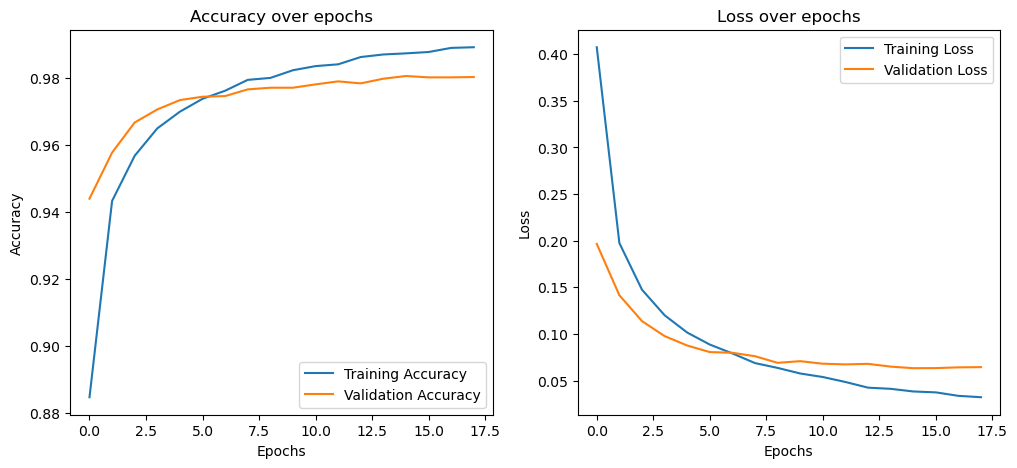

In [3]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
# Flatten 28x28 images into 784-dimensional vectors and normalize pixel values
X_train = X_train.reshape((X_train.shape[0], 28 * 28)).astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], 28 * 28)).astype('float32') / 255

# Convert labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the neural network model with ReLU activation and Dropout
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(128, activation='relu', input_shape=(28 * 28,)))  # Hidden layer with ReLU
    model.add(layers.Dropout(0.2))  # Dropout layer to prevent overfitting
    model.add(layers.Dense(10, activation='softmax'))  # Output layer
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Build the model
model = build_model()

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model for 20 epochs with EarlyStopping
history = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_data=(X_test, y_test), verbose=2, callbacks=[early_stopping])

# Plot the loss and accuracy over the epochs
def plot_learning_curves(history):
    # Plot accuracy
    plt.figure(figsize=(12, 5))

    # Plot Accuracy over time
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy over epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot Loss over time
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss over epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Call the function to plot the learning curves
plot_learning_curves(history)